<a href="https://colab.research.google.com/github/MMoltira/DataMining/blob/master/Divorce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #เอาข้อมูลเข้า
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/DWDM_material'

In [ ]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
divorce_1 = os.path.join(path,'divorce_1.csv')

In [ ]:
divorce_1 = pd.read_csv(divorce_1)
divorce_1

,จังหวัด,couple_div
0,กรุงเทพมหานคร 53,16608.0
1,สมุทรปราการ 53,3683.0
2,นนทบุรี 53,2389.0
3,ปทุมธานี 53,2370.0
4,พระนครศรีอยุธยา 53,1981.0
...,...,...
226,ตรัง 55,742.0
227,พัทลุง 55,704.0
228,ปัตตานี 55,255.0
229,ยะลา 55,301.0


In [ ]:
divorce_1.shape

(231, 2)

In [ ]:
divorce_1.isnull().any()

จังหวัด       False
couple_div     True
dtype: bool

In [ ]:
divorce_1[['couple_div']] = divorce_1[['couple_div']].fillna(0) 

In [ ]:
divorce_1.isnull().any()

จังหวัด       False
couple_div    False
dtype: bool

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Xd = divorce_1[['couple_div']] #Xd คือตัวแปรของการหย่า

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
Xd,y=make_blobs(n_samples=231, centers=2, n_features=2, random_state=6)

In [ ]:
Xd.shape 

(231, 2)

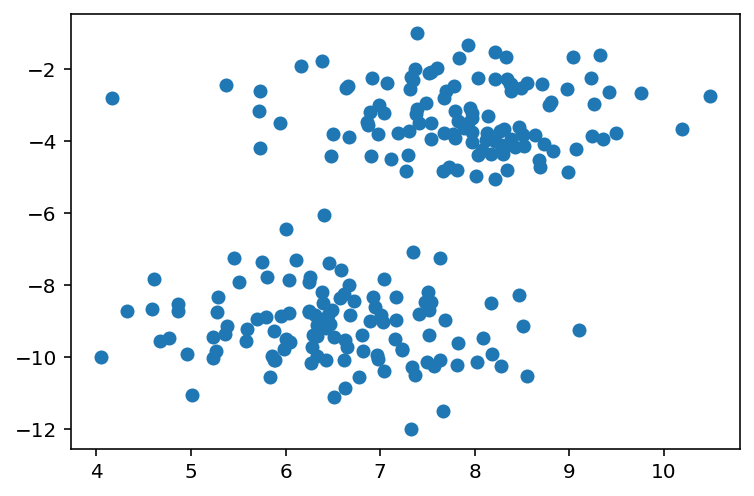

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(Xd[:,0],Xd[:,1]) #จะแบ่งเป็น 3 กลุ่ม ตาม centers=3

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMclust=KMeans(n_clusters=2) # n_clusters=2 การกำหนดตัวแบ่งว่าจะแบ่งให้มีกลุ่ม 2 กลุ่ม

In [ ]:
KMclust.fit(Xd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
label=KMclust.predict(Xd) # predict ว่าอยู่ในกลุ่มไหน

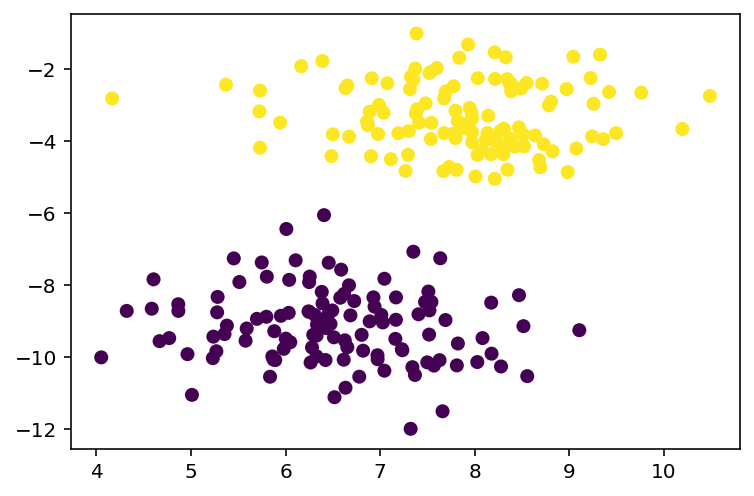

In [ ]:
plt.scatter(Xd[:,0], Xd[:,1], c=label) # เปลี่ยนสีให้เป็นไปตาม label ของเราโดยการสุ่ม

In [ ]:
n_krachukd = 2 # จำนวนกระจุก
n_thamsamd = 100 # จำนวนทำซ้ำสูงสุด
tol = 0.0001 # ค่าความเปลี่ยนแปลงสูงสุดที่ยอมให้หยุดได้
sumlueakd = np.random.choice(len(Xd),n_krachukd,replace=0)
X_cend = Xd[sumlueakd] # จุดเซนทรอยด์ตั้งต้น เลือกแบบสุ่ม
# วนซ้ำเพื่อปรับเซนทรอยด์
for i in range(n_thamsamd):
    raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2) # วัดระยะห่างจากจุดถึงเซนทรอยด์
    klumd = raya2d.argmin(1) # ตัดสินกลุ่มของจุดโดยเลือกเซนทรอยด์ที่ใกล้สุด
    X_cen_maid = np.empty_like(X_cend) # จุดเซนทรอยด์ใหม่
    # วนซ้ำเพื่อหาตำแหน่งเซนทรอยด์ใหม่
    for j in range(n_krachukd):
        if(len(Xd[klumd==j])): # ถ้ามีสมาชิกในกลุ่ม
            X_cen_maid[j] = Xd[klumd==j].mean(0) # กำหนดเซนทรอยด์ใหม่เป็นตำแหน่งเฉลี่ยของทุกจุดในกลุ่ม
        else: # ถ้าในกลุ่มว่างเปล่าก็ให้สุ่มเซนทรอยด์ใหม่
            X_cen_maid[j] = Xd[np.random.randint(len(Xd))]
    if(np.allclose(X_cend,X_cen_maid,atol=tol)): # ถ้าความเปลี่ยนแปลงน้อยกว่าค่าที่กำหนดก็ให้หยุด
        X_cend = X_cen_maid
        break
    X_cend = X_cen_maid # ย้ายจุดเซนทรอยด์ไปยังตำแหน่งใหม่

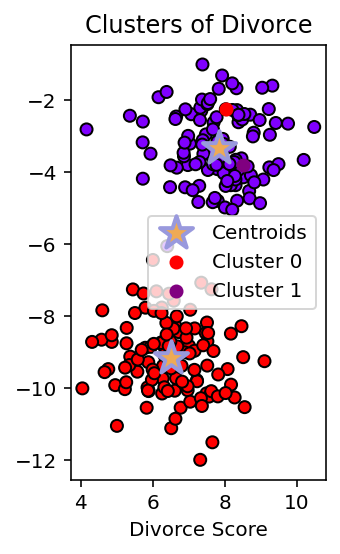

In [ ]:
raya2d = ((X_cend[None]-Xd[:,None])**2).sum(2)
zd = raya2d.argmin(1)
plt.gca(aspect=1)
plt.scatter(Xd[:,0],Xd[:,1],c=zd,edgecolor='k',cmap='rainbow')
plt.scatter(X_cend[:,0],X_cend[:,1],300,'#EEAA55',marker='*',edgecolor='#9999DD',lw=2, label = 'Centroids')
plt.scatter(Xd[0,0], Xd[0,1], c = 'red', label = 'Cluster 0')
plt.scatter(Xd[1,0], Xd[1,1], c = 'purple', label = 'Cluster 1')
plt.title('Clusters of Divorce')
plt.xlabel('Divorce Score')
plt.legend()
plt.show()

In [ ]:
ssed = 0
for i in range(n_krachukd):
    ssed += np.sum(raya2d[zd==i,i])
print(ssed)

444.60753115747195


In [ ]:
KMclust.cluster_centers_

array([[ 7.17049205, -6.18852947],
       [-7.79775007,  1.78610777]])

In [ ]:
KMclust.transform(Xd) # the distance between each point and centroid

array([[ 4.35657384, 19.46286796],
       [ 2.71215952, 17.25282908],
       [ 2.70884496, 16.22743323],
       [ 5.05983897, 17.45766143],
       [ 2.02897205, 16.04954075],
       [ 2.56177615, 16.71518607],
       [15.64664579,  1.34745187],
       [ 3.4711508 , 18.87195087],
       [16.62190693,  1.50652845],
       [ 2.7266152 , 17.23167107],
       [16.6160869 ,  0.34904234],
       [ 4.03944671, 16.52353791],
       [ 3.85827321, 14.22449676],
       [17.02789616,  0.19453677],
       [ 3.61896268, 18.53323763],
       [17.58481661,  0.66590015],
       [ 2.30713982, 17.77093305],
       [17.02693124,  1.03696265],
       [17.19176311,  0.52754238],
       [15.33005926,  1.64582881],
       [15.60783922,  1.39409006],
       [ 2.91852292, 16.48022043],
       [ 3.12708999, 18.0930437 ],
       [ 2.26100905, 17.36691817],
       [15.76940085,  2.22813124],
       [ 2.44106119, 17.36937133],
       [ 4.77217036, 18.84251956],
       [ 3.43700643, 18.43292038],
       [ 2.62046403,

In [ ]:
KMclust.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [ ]:
ssdd=[] #ssdd เซ็ทว่างของการหย่า
for k in range(2, 10):
    m=KMeans(n_clusters=k)
    m.fit(Xd)
    ssdd.append([k, m.inertia_])
ssdd

[[2, 1751.9669425508212],
 [3, 444.034965979045],
 [4, 380.2639248784881],
 [5, 327.70702540620925],
 [6, 274.11757123043503],
 [7, 241.3538838811859],
 [8, 211.51217962290133],
 [9, 188.84502697841208]]

In [ ]:
xyd= np.array(ssdd) #ssdd เซ็ทว่างของการหย่า
print(xyd) #xyd ตัวแปรของ xy ของการหย่า

[[   2.         1751.96694255]
 [   3.          444.03496598]
 [   4.          380.26392488]
 [   5.          327.70702541]
 [   6.          274.11757123]
 [   7.          241.35388388]
 [   8.          211.51217962]
 [   9.          188.84502698]]


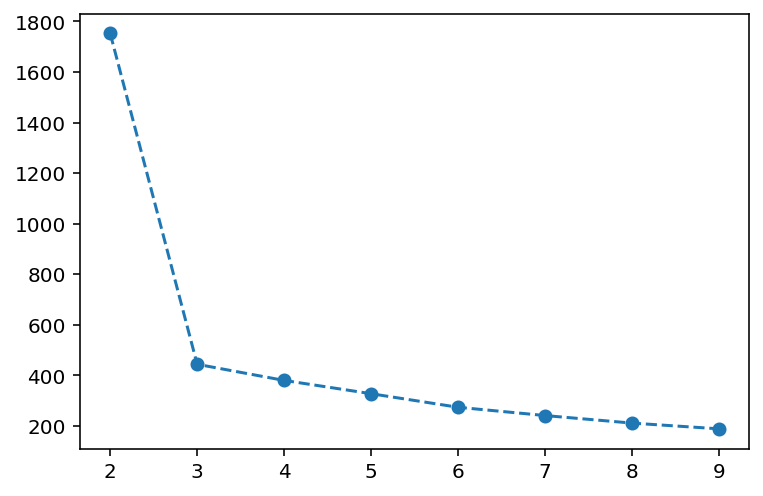

In [ ]:
plt.plot(xyd[:, 0], xyd[:, 1], linestyle='--', marker='o') #xyd ตัวแปรของ xy ของการหย่า
# plt.plot(xy[:, 0], xy[:, 1], '--o')

In [ ]:
ddd=pd.DataFrame(ssdd, columns=['k', 'ssdd']) #ddd ตัวแปรของการหย่า
ddd

,k,ssdd
0,2,1751.966943
1,3,444.034966
2,4,380.263925
3,5,327.707025
4,6,274.117571
5,7,241.353884
6,8,211.512180
7,9,188.845027


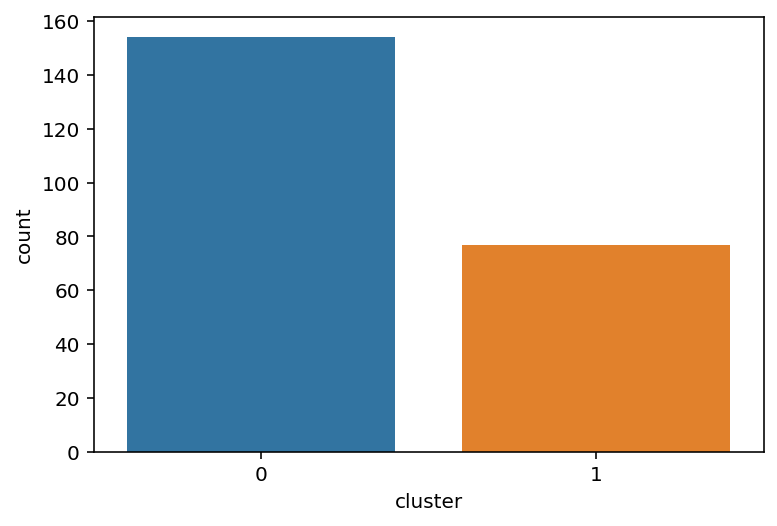

In [ ]:
sns.countplot(x='cluster', data=divorce_1)

In [ ]:
divorce_1.groupby('cluster').describe().T

cluster                      0            1
couple_div count    154.000000    77.000000
           mean    1560.675325  1107.480519
           std     2211.643017   814.130673
           min      134.000000     0.000000
           25%      674.250000   472.000000
           50%     1036.000000   926.000000
           75%     1647.250000  1465.000000
           max    16608.000000  4446.000000

In [ ]:
divorce_1

,จังหวัด,couple_div,cluster
0,กรุงเทพมหานคร 53,16608.0,0
1,สมุทรปราการ 53,3683.0,0
2,นนทบุรี 53,2389.0,0
3,ปทุมธานี 53,2370.0,0
4,พระนครศรีอยุธยา 53,1981.0,0
...,...,...,...
226,ตรัง 55,742.0,1
227,พัทลุง 55,704.0,0
228,ปัตตานี 55,255.0,1
229,ยะลา 55,301.0,1
